# LSTM_4_Intent

In [1]:
from gensim.models import FastText

model = FastText.load('fasttext_model')
fasttext = model.wv

c:\users\yunja_kuj61s9\appdata\local\programs\python\python36\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('training_4_intent.csv')
data = data[['tokens', 'intent']]

X_data = data['tokens']
y_data = data['intent']

AskFlight                                             600
AskFlight, AskFlightWithAirline                       600
AskFlight, AskFlightWithCost, AskFlightWithAirline    600
AskFlight, AskFlightWithCost                          600
Name: intent, dtype: int64

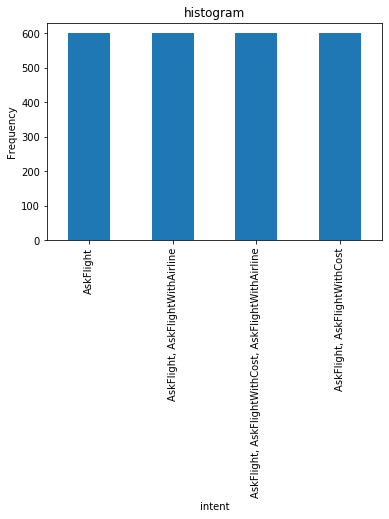

In [3]:
%matplotlib inline

pd.value_counts(data['intent']).plot.bar()
plt.title('histogram')
plt.xlabel('intent')
plt.ylabel('Frequency')

data['intent'].value_counts()

In [4]:
from nltk import sent_tokenize, word_tokenize
import import_ipynb
import intent_4 # AskFlight, AskFlight/AskFlightWithCost, AskFlight/AskFlightWithAirline
                # AskFlight, AskFlightWithCost, AskFlightWithAirline(AskAll)

tokenized_X = [] # 토큰화한 문장 (단어, 단어, 단어, ...)
for line in X_data :
    tokenized_X.append(word_tokenize(line))

vectored_X = [] # 토큰화한 문장을 벡터로
for sent in tokenized_X :
    vectored_X.append([fasttext[v].tolist() for v in sent])

vectored_y = []
for index in y_data : 
    vectored_y.append(intent_4.intent(index))

importing Jupyter notebook from intent_4.ipynb


In [5]:
X = np.array(vectored_X)
y = np.array(vectored_y)

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (2400,)
Shape of y: (2400,)


In [11]:
from keras.preprocessing.sequence import pad_sequences
from keras import backend as k

_dtype = k.floatx()
max_len = 45
data = pad_sequences(X, maxlen = max_len, dtype = _dtype)

In [12]:
max_len

45

In [13]:
n_of_train = int(len(X_data) * 0.85)
n_of_test = int(len(X_data) - n_of_train)

In [14]:
X_train = data[ : n_of_train]
y_train = y[ : n_of_train]
X_test = data[n_of_train : ]
y_test = y[n_of_train : ]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2040, 45, 300) (2040,) (360, 45, 300) (360,)


# RNN 학습시키는 부분

In [15]:
from keras.layers import LSTM, Embedding, Dense
from keras.models import Sequential

model = Sequential()
model.add(LSTM(30, activation='tanh'))
model.add(Dense(4, activation = 'softmax')) # 출력층
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 42, epochs = 50)
# batch_size는 한 번에 학습하는 데이터의 개수

print(model.summary())

Epoch 1/50
2040/2040 [==============================] - 4s 2ms/step - loss: 1.1437 - acc: 0.5260
Epoch 2/50
2040/2040 [==============================] - 3s 1ms/step - loss: 0.4623 - acc: 0.8618
Epoch 3/50
2040/2040 [==============================] - 3s 1ms/step - loss: 0.2116 - acc: 0.9417
Epoch 4/50
2040/2040 [==============================] - 3s 1ms/step - loss: 0.1431 - acc: 0.9676
Epoch 5/50
2040/2040 [==============================] - 3s 1ms/step - loss: 0.0986 - acc: 0.9779
Epoch 6/50
2040/2040 [==============================] - 3s 1ms/step - loss: 0.0904 - acc: 0.9794
Epoch 7/50
2040/2040 [==============================] - 3s 1ms/step - loss: 0.0700 - acc: 0.9858
Epoch 8/50
2040/2040 [==============================] - 3s 1ms/step - loss: 0.0618 - acc: 0.9877
Epoch 9/50
2040/2040 [==============================] - 3s 1ms/step - loss: 0.0518 - acc: 0.9892
Epoch 10/50
2040/2040 [==============================] - 3s 1ms/step - loss: 0.0411 - acc: 0.9907
Epoch 11/50
2040/2040 [======

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_true = y_test
y_pred = model.predict_classes(X_test, verbose = 0)

print(classification_report(y_true, y_pred, 
                            target_names = ['AskFlight', 'AskFlight, AskFlightWithCost',
                                            'AskFlight, AskFlightWithAirline', 
                                            'AskFlight, AskFlightWithCost, AskFlightWithAirline']))

                                                    precision    recall  f1-score   support

                                         AskFlight       0.93      0.96      0.95        90
                      AskFlight, AskFlightWithCost       0.76      0.97      0.85        90
                   AskFlight, AskFlightWithAirline       0.77      0.96      0.85        90
AskFlight, AskFlightWithCost, AskFlightWithAirline       0.95      0.44      0.61        90

                                          accuracy                           0.83       360
                                         macro avg       0.85      0.83      0.81       360
                                      weighted avg       0.85      0.83      0.81       360



In [17]:
def ans(lst) :
    ans = ["AskFlight", "AskFlight, AskFlightWithCost", 
           "AskFlight, AskFlightWithAirline", "AskFlight, AskFlightWithCost, AskFlightWithAirline"]
    temp = [[i, lst[i]] for i in range(4)]
    temp.sort(key = lambda x : x[1], reverse = True)

    print(ans[temp[0][0]])

In [18]:
from keras.preprocessing import sequence

def predict(sentence) :
    sentence = sentence
    sentence_token = []
    sentence_token += word_tokenize(sentence)
    
    sentence_vec = []
    sentence_vec.append([fasttext[v] for v in sentence_token])
    
    padd = sequence.pad_sequences(sentence_vec, maxlen = max_len, dtype = _dtype)
    intent = ans(model.predict(padd)[0])
    
    return(intent)

In [19]:
from keras.models import *
from keras.utils import *

model.save('LSTM_model.h5')

In [20]:
# 임의 지정한 문장으로 의도 예측 테스트

predict('from la to san francisco') # AskFlight
predict('cheapest one from miami to denver') # AskFlight, AskFlightWithCost
predict('cheapest from denver to philadelphia on monday by delta') # AskFlight, AskFlightWithCost, AskFlightWithAirline
predict('denver to philadelphia under 100 dollars') # AskFlight, AskFlightWithCost
predict('flight from miami to denver on monday') # AskFlight
predict('one way fare from miami to denver on delta') # AskFlight, AskFlightWithCost, AskFlightWithAirline
predict('flight from incheon to jeju on monday under 50 dollars') # AskFlight, AskFlightWithCost

AskFlight
AskFlight, AskFlightWithCost
AskFlight, AskFlightWithCost, AskFlightWithAirline
AskFlight, AskFlightWithCost
AskFlight
AskFlight, AskFlightWithCost, AskFlightWithAirline
AskFlight, AskFlightWithCost
